In [1]:
import bayesian_cart_complexity as BC
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets, svm, metrics
import random


Definimos la densidad de un árbol como:
$$ Density(T)=\frac{N_{leafs}}{2^{depth(T)}} = \frac{N_{innernode}+ 1}{2^{depth(T)}}$$
$Density(T) = 1$ cuando tiene todos las hojas en el mismo nivel.

$Density(T) << 1$ más chico si las hojas difieren de altura con la máxima.

### Cargamos los dataset
#### load_breast_cancer de Sklearn

In [105]:
data = load_breast_cancer()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['target'] = data['target']
full_data = load_breast_cancer()
feature_names = full_data.feature_names
labels_names = full_data.target_names

In [106]:
df = load_breast_cancer()
feature = df.data
label = df.target
X_train, X_test, y_train, y_test = train_test_split(feature, label)

In [107]:
def even_gamma(N):
    return lambda x : -0.25/(N-1)*x + N/(N-1) * 0.25

In [108]:
def plot_accuracy(clf , X_train, y_train, X_test, y_test):
    path = clf.path
    alpha = clf.alpha
    beta = clf.beta
    prob = clf.prob
    accuracy_train = clf.path_acurracy(X_train,y_train)
    accuracy_test = clf.path_acurracy(X_test,y_test)
    figure = plt.figure(figsize = (15,8))
    plt.plot(list(range(len(accuracy_train))),accuracy_train, label = "train")
    plt.plot(list(range(len(accuracy_test))),accuracy_test, label = "test")
    plt.suptitle(f"Accuracy vs Iteración")
    plt.title(f"[$\\alpha$ = {alpha}, $\\beta$ = {beta}, $prob$ = {prob}]")
    plt.xlabel("Iteración")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

In [109]:
def plot_info(clf):
    path = clf.path
    alpha = clf.alpha
    beta = clf.beta
    prob = clf.prob
    path_info = clf.path_info()
    fig, (ax1, ax2) = plt.subplots(2,1, figsize= [15,10])
    fig.suptitle(f'[$\\alpha$ = {alpha}, $\\beta$ = {beta}, $prob$ = {prob}]')
    
    ax1.plot(path_info[:,0] ,label="depth" )
    ax1.plot(path_info[:,1] ,label="leafs" )
    ax1.set_title("Estructura vs Iteración")
    ax1.set_xlabel("Iteración")
    ax1.set_ylabel("Profundida y hojas")
    ax1.legend()
    
    ax2.plot(path_info[1:,1]/(2**path_info[1:,0]) ,label="density" )
    ax2.legend()
    ax2.set_title("Densidad del Árbol vs Iteración")
    ax2.set_xlabel("Iteración")
    ax2.set_ylabel("Densidad del Árbol")
    plt.show()

In [110]:
# (alpha, beta, prob)
small_search = (0.001, 0.5, [0.1,0.1,0.4,0.4])
medium_search = (0.5, 0.5, [0.2,0.2,0.3,0.3])
big_search = (0.95, 0.5, [0.25,0.25,0.25,0.25])
default_search = (0.5, 0.5, [0.25,0.25,0.25,0.25])

N = 200
gamma_0 = even_gamma(N)

In [111]:
alpha, beta, prob = medium_search
bayesian_tree = BC.BayesianDecisionTree(alpha = alpha , beta = beta, prob = prob, gamma_t=gamma_0)
bayesian_tree.fit(N ,X_train,y_train)

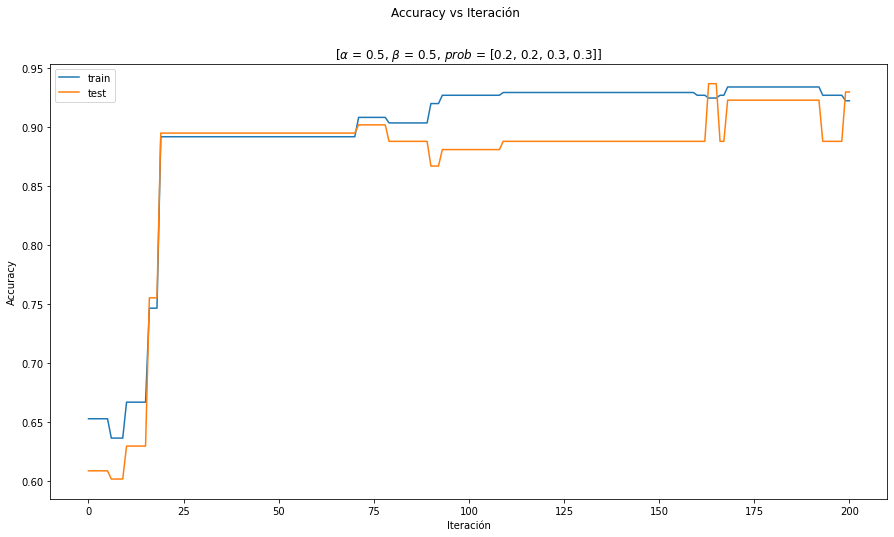

In [112]:
plot_accuracy(bayesian_tree , X_train, y_train, X_test, y_test)

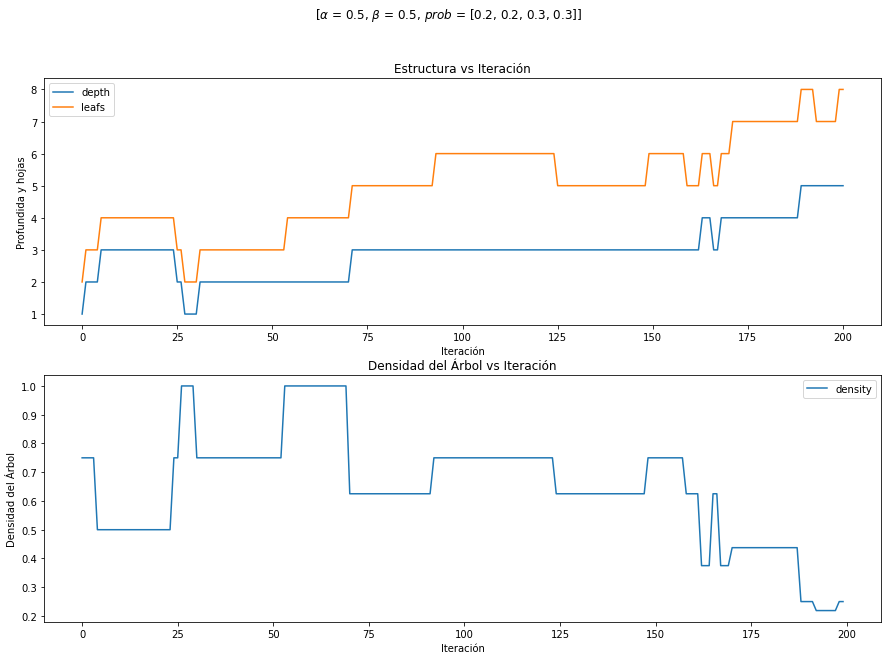

In [113]:
plot_info(bayesian_tree)

In [96]:
accuracy_test = bayesian_tree.path_acurracy(X_test,y_test)
idx_test_max = np.argmax(accuracy_test)
best_tree = bayesian_tree.path[idx_test_max]
best_tree.set_labels(feature_names,labels_names)
print(f"El mejor acurracy de testeo fue : {accuracy_test[idx_test_max]}")
# best_tree.save_img("Arboles5/1")

El mejor acurracy de testeo fue : 0.9230769230769231


In [97]:
print("Descisiones aceptadas: ")
print(np.array(bayesian_tree.choices)[bayesian_tree.chosen])

Descisiones aceptadas: 
['start' 'grow' 'change' 'grow' 'change' 'change' 'change' 'change' 'grow'
 'change' 'grow' 'prune' 'grow' 'prune' 'swap' 'swap' 'grow' 'change'
 'swap']


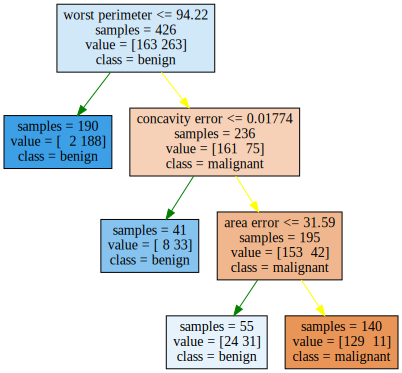

In [98]:
best_tree.graph_desiciontree()

In [34]:
# if not os.path.isdir("Change"):
#     os.mkdir("Change")
# for i,tree_chage in enumerate(bayesian_tree.tree_changes()):
#     tree_chage.save_img_hd(f"Change/{i}")

### Dataset de iris

In [114]:
iris = datasets.load_iris()
feature_names_iris = iris.feature_names
labels_names_iris = iris.target_names
X_iris = iris.data 
y_iris = iris.target
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris, y_iris, random_state= 42)

N_iris = 300
gamma_0_iris = even_gamma(N_iris)

In [115]:
alpha, beta, prob = medium_search
bayesian_tree_iris = BC.BayesianDecisionTree(alpha = alpha, beta = beta, prob = prob, gamma_t=gamma_0_iris)
bayesian_tree_iris.fit(N_iris,X_iris_train,y_iris_train)

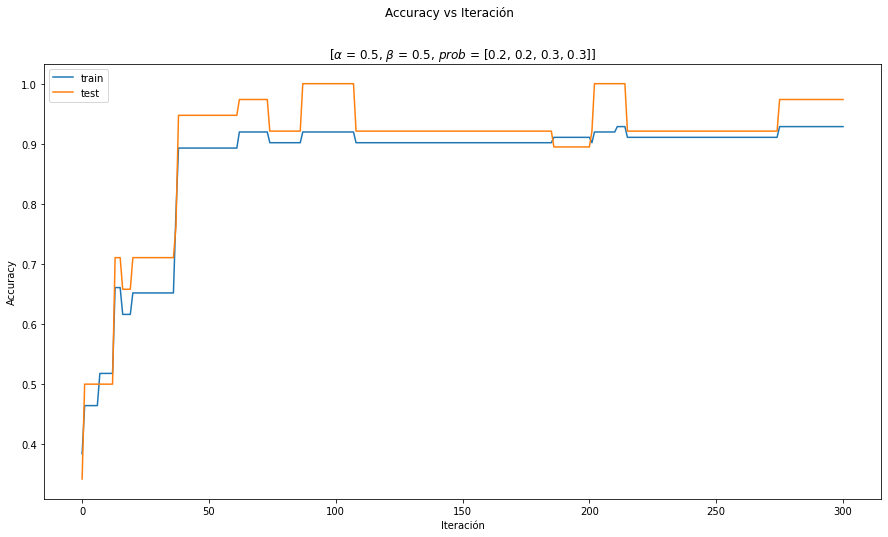

In [116]:
plot_accuracy(bayesian_tree_iris, X_iris_train, y_iris_train, X_iris_test, y_iris_test)

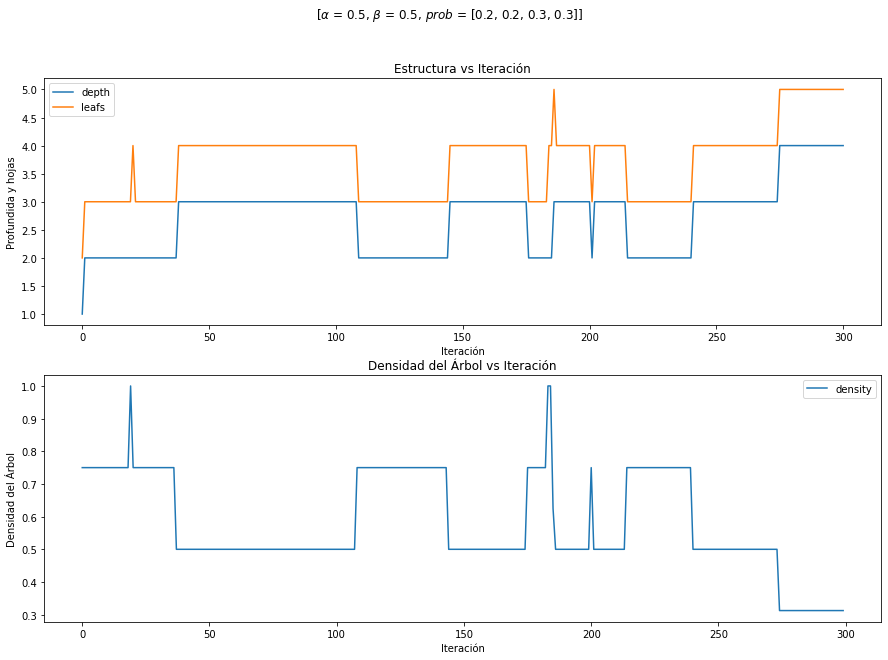

In [117]:
plot_info(bayesian_tree_iris)

In [119]:
path_iris = bayesian_tree_iris.path
accuracy_iris_test = bayesian_tree_iris.path_acurracy(X_iris_test, y_iris_test)
idx_test_max_iris = np.argmax(accuracy_iris_test)
best_tree_iris = path_iris[idx_test_max_iris]
best_tree_iris.set_labels(feature_names_iris,labels_names_iris)
print(f"El mejor acurracy de testeo fue : {accuracy_iris_test[idx_test_max_iris]}")


El mejor acurracy de testeo fue : 1.0


In [120]:
print("Descisiones aceptadas: ")
print(np.array(bayesian_tree_iris.choices)[bayesian_tree_iris.chosen])

Descisiones aceptadas: 
['start' 'grow' 'change' 'change' 'change' 'grow' 'prune' 'change' 'grow'
 'change' 'change' 'change' 'change' 'change' 'change' 'prune' 'grow'
 'prune' 'grow' 'grow' 'prune' 'prune' 'grow' 'change' 'prune' 'change'
 'change' 'grow' 'swap' 'grow' 'change']


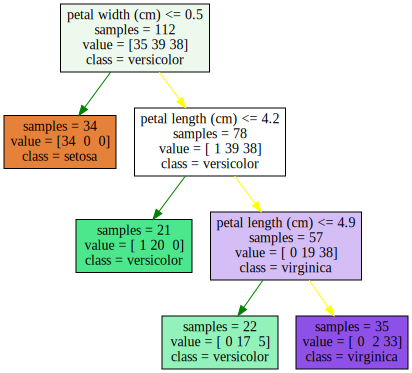

In [121]:
best_tree_iris.graph_desiciontree()

### Dataset de Digits

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


<Figure size 432x288 with 0 Axes>

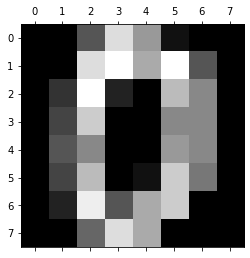

In [122]:
from sklearn.datasets import load_digits
digits=load_digits()
plt.gray() 
plt.matshow(digits.images[0]) 
print(digits.images[0])
plt.show() 

In [123]:
n_samples = len(digits.images)
data_digit = digits.images.reshape((n_samples, -1))
digits_target = digits.target
# digits_target0 =  digits_target[digits_target==0]
# digits_target1 =  digits_target[digits_target==1]
# digits_target2 =  digits_target[digits_target==2]
# digits_target2 =  digits_target[digits_target==3]

# data_digit0 =  data_digit[digits_target==0]
# data_digit1 =  data_digit[digits_target==1]
# data_digit2 =  data_digit[digits_target==2]

# data_digit = np.concatenate((data_digit0,data_digit1,data_digit2))
# digits_target = np.concatenate((digits_target0,digits_target1,digits_target2))

X_train_digit, X_test_digit, y_train_digit, y_test_digit = train_test_split(
    data_digit, digits_target, test_size=0.5, shuffle=True , random_state=22)

In [124]:
feature_names_digit = digits.feature_names
labels_names_digit = digits.target_names

 ####  $\alpha=0.5, \beta= 0.5,prob = [0.25,0.25,0.25,0.25]$

In [132]:
N_digits = 1500
gamma_0_digits = even_gamma(N_digits)

In [133]:
bayesian_tree_digit = BC.BayesianDecisionTree(alpha=0.5, beta= 0.5,prob = [0.25,0.25,0.25,0.25], gamma_t=gamma_0_digits)
bayesian_tree_digit.fit(N_digits,X_train_digit ,y_train_digit)

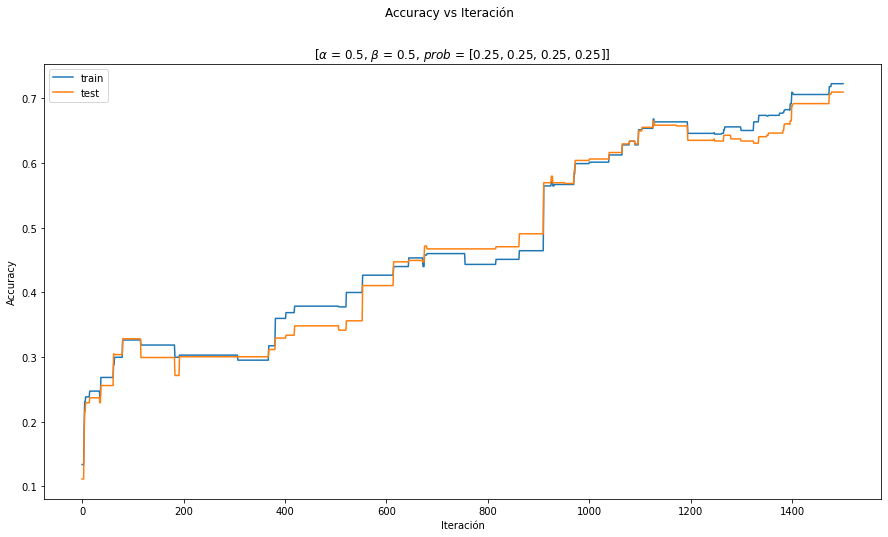

In [134]:
plot_accuracy(bayesian_tree_digit, X_train_digit, y_train_digit, X_test_digit, y_test_digit)

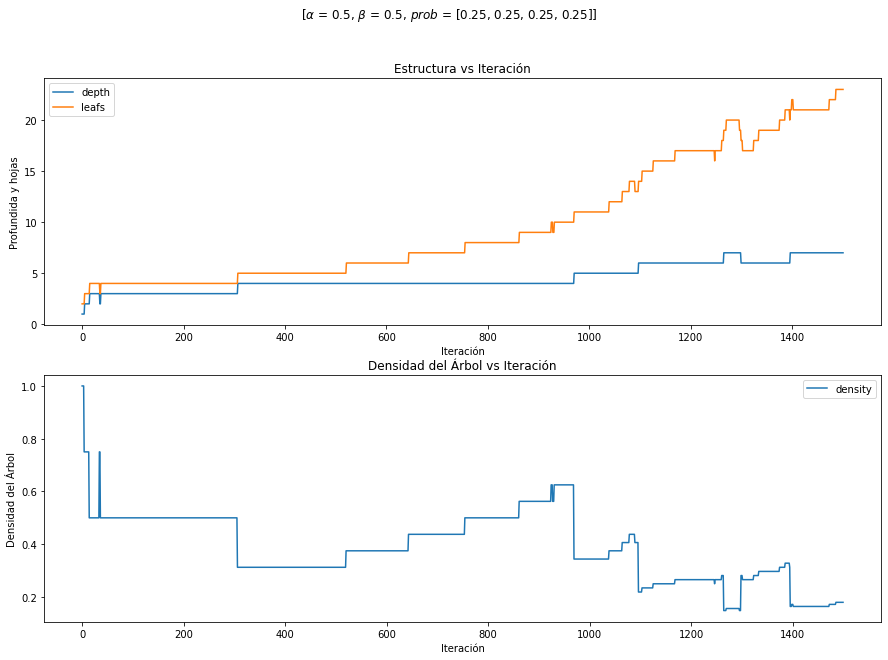

In [135]:
plot_info(bayesian_tree_digit)

In [137]:
path_digit = bayesian_tree_digit.path
accuracy_digit_test = bayesian_tree_digit.path_acurracy(X_test_digit, y_test_digit)
idx_test_max_digit = np.argmax(accuracy_digit_test)
best_tree_digit = path_digit[idx_test_max_digit]
best_tree_digit.set_labels(feature_names_digit,labels_names_digit)
print(f"El mejor acurracy de testeo fue : {accuracy_digit_test[idx_test_max_digit]}")


El mejor acurracy de testeo fue : 0.7096774193548387


In [138]:
print("Descisiones aceptadas: ")
print(np.array(bayesian_tree_digit.choices)[bayesian_tree_digit.chosen])

Descisiones aceptadas: 
['start' 'change' 'grow' 'change' 'grow' 'prune' 'grow' 'change' 'change'
 'change' 'change' 'change' 'swap' 'change' 'grow' 'change' 'change'
 'change' 'change' 'change' 'grow' 'change' 'change' 'grow' 'change'
 'change' 'change' 'change' 'grow' 'change' 'grow' 'change' 'grow' 'prune'
 'grow' 'change' 'grow' 'swap' 'change' 'grow' 'grow' 'grow' 'prune'
 'grow' 'grow' 'grow' 'change' 'grow' 'change' 'change' 'swap' 'prune'
 'grow' 'grow' 'grow' 'change' 'grow' 'change' 'prune' 'prune' 'prune'
 'grow' 'grow' 'change' 'swap' 'grow' 'change' 'change' 'grow' 'prune'
 'grow' 'grow' 'swap' 'prune' 'grow' 'swap' 'grow']


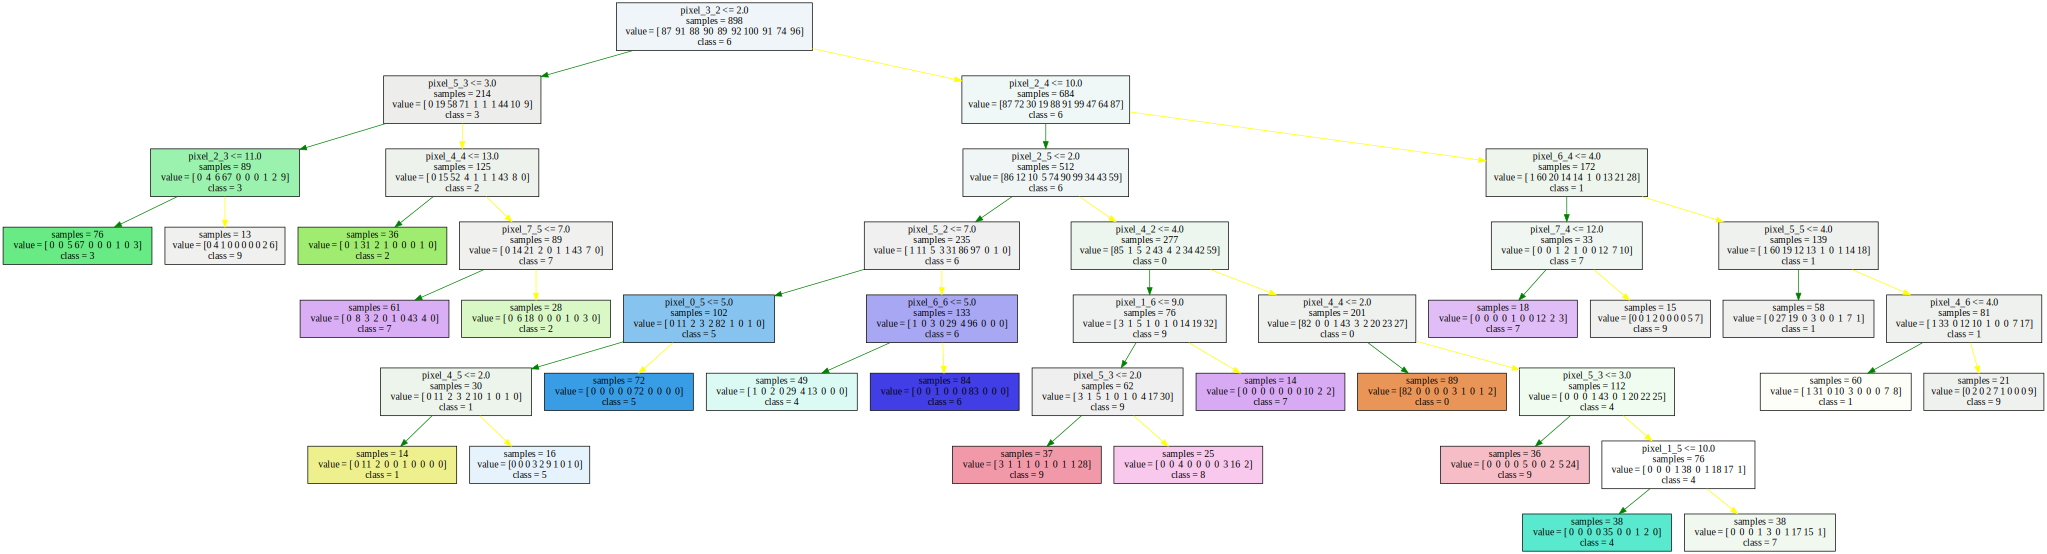

In [139]:
best_tree_digit.graph_desiciontree()

              precision    recall  f1-score   support

           0       0.98      0.89      0.93        91
           1       0.44      0.79      0.56        91
           2       0.86      0.73      0.79        89
           3       0.94      0.65      0.76        93
           4       0.71      0.65      0.68        92
           5       0.91      0.78      0.84        90
           6       1.00      0.85      0.92        81
           7       0.57      0.84      0.68        88
           8       0.81      0.17      0.28       100
           9       0.54      0.83      0.65        84

    accuracy                           0.71       899
   macro avg       0.77      0.72      0.71       899
weighted avg       0.77      0.71      0.70       899

[[81  1  0  0  2  0  0  1  0  6]
 [ 0 72  2  1  0  2  0  8  0  6]
 [ 0 18 65  1  0  0  0  3  1  1]
 [ 0 12  2 60  0  1  0  4  1 13]
 [ 0  9  0  0 60  4  0  5  0 14]
 [ 2  6  0  0  7 70  0  2  0  3]
 [ 0  1  1  0  9  0 69  1  0  0]
 [ 0  6  0

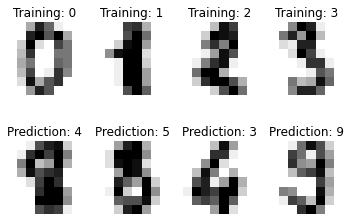

In [140]:
y_pred_digit = best_tree_digit.predict(X_test_digit)

_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

    images_and_predictions = list(zip(digits.images[n_samples // 2:], y_pred_digit))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)

print((metrics.classification_report(y_test_digit, y_pred_digit)))
print((metrics.confusion_matrix(y_test_digit, y_pred_digit)))

### Probamos distintos parametros

 ####  $\alpha=0.85, \beta= 0.5,prob = [0.25,0.25,0.25,0.25]$

In [141]:
N_digits2 = 1500
gamma_0_digits2 = even_gamma(N_digits2)

In [142]:
bayesian_tree_digit2 = BC.BayesianDecisionTree(alpha=0.85, beta= 0.5,prob = [0.25,0.25,0.25,0.25], gamma_t=gamma_0_digits2)
bayesian_tree_digit2.fit(N_digits2,X_train_digit ,y_train_digit)

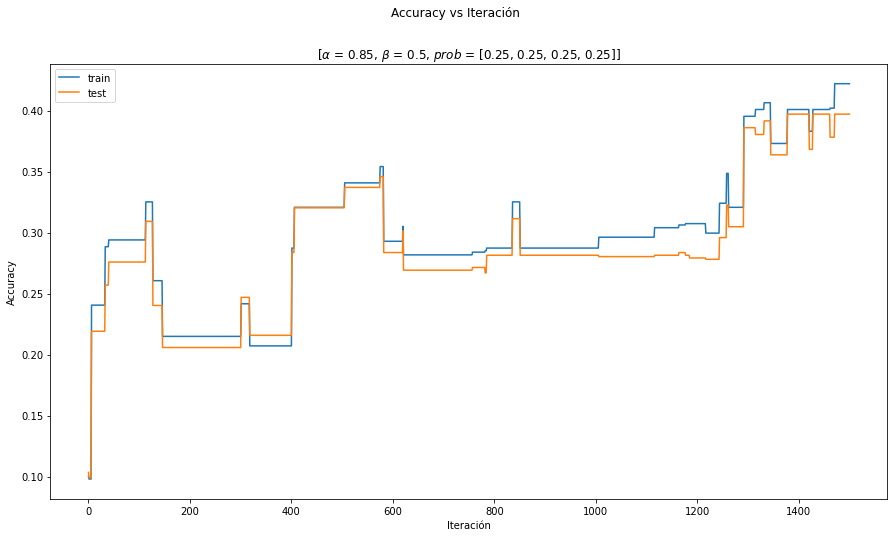

In [143]:
plot_accuracy(bayesian_tree_digit2, X_train_digit, y_train_digit, X_test_digit, y_test_digit)

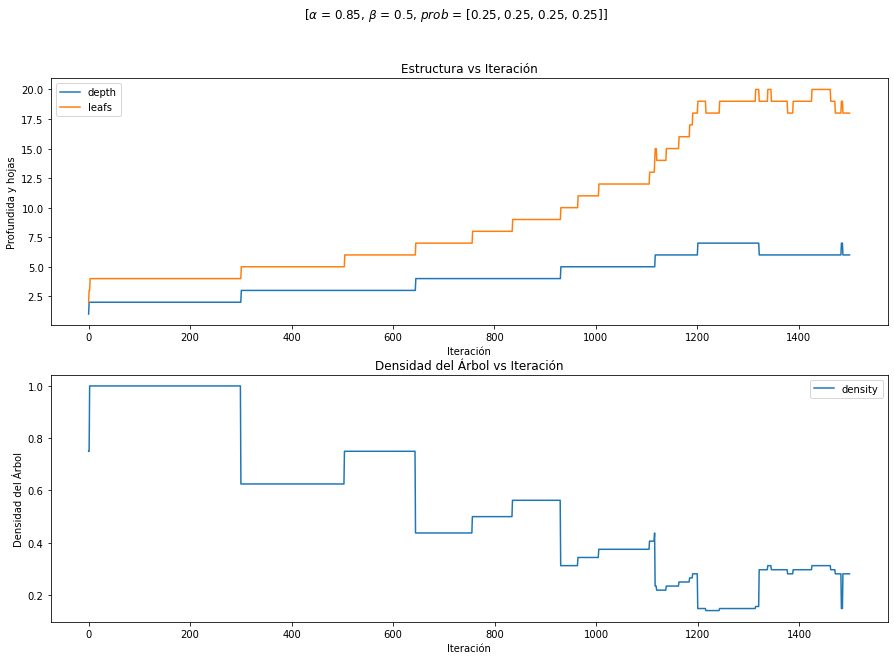

In [144]:
plot_info(bayesian_tree_digit2)

In [147]:
path_digit2 = bayesian_tree_digit2.path
accuracy_digit_test2 = bayesian_tree_digit2.path_acurracy(X_test_digit, y_test_digit)
idx_test_max_digit2 = np.argmax(accuracy_digit_test2)
best_tree_digit2 = path_digit2[idx_test_max_digit2]
best_tree_digit2.set_labels(feature_names_digit,labels_names_digit)
print(f"El mejor acurracy de testeo fue : {accuracy_digit_test2[idx_test_max_digit2]}")

El mejor acurracy de testeo fue : 0.3971078976640712


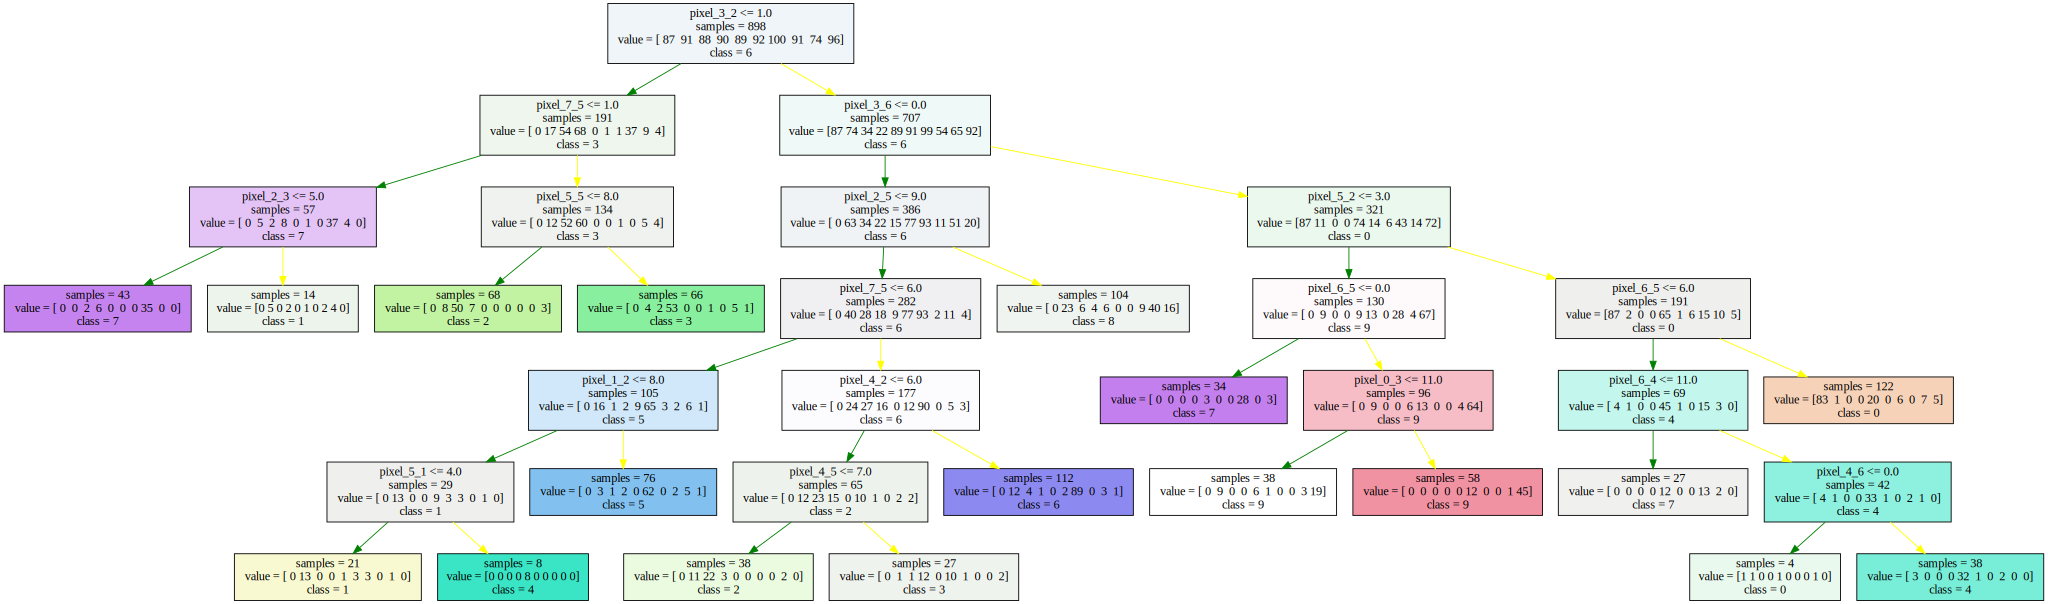

In [148]:
best_tree_digit2.graph_desiciontree()

              precision    recall  f1-score   support

           0       0.31      0.98      0.47        91
           1       0.30      0.03      0.06        91
           2       0.78      0.57      0.66        89
           3       0.72      0.54      0.62        93
           4       0.47      0.45      0.46        92
           5       0.00      0.00      0.00        90
           6       0.00      0.00      0.00        81
           7       0.53      0.57      0.55        88
           8       0.00      0.00      0.00       100
           9       0.26      0.87      0.39        84

    accuracy                           0.40       899
   macro avg       0.34      0.40      0.32       899
weighted avg       0.34      0.40      0.32       899

[[89  0  0  0  2  0  0  0  0  0]
 [11  3  5  2 13  0  0 13  0 44]
 [11  0 51  7  1  0  0  3  0 16]
 [ 6  0  7 50  0  0  0  4  0 26]
 [28  0  0  0 41  0  0  8  0 15]
 [ 9  0  0  0  6  0  0  2  0 73]
 [70  0  0  1  0  0  0 10  0  0]
 [ 0  5  0

C:\Users\jorge\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jorge\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jorge\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


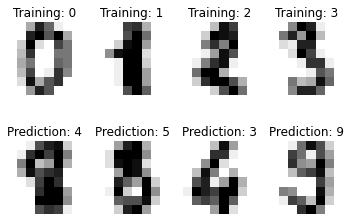

In [149]:
y_pred_digit2 = best_tree_digit2.predict(X_test_digit)

_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

    images_and_predictions = list(zip(digits.images[n_samples // 2:], y_pred_digit))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)

print((metrics.classification_report(y_test_digit, y_pred_digit2)))
print((metrics.confusion_matrix(y_test_digit, y_pred_digit2)))

 ####  $\alpha=0.5, \beta= 0.5,prob = [0.1,0.1,0.4,0.4]$

In [150]:
N_digits3 = 1500
gamma_0_digits3 = even_gamma(N_digits3)

In [152]:
bayesian_tree_digit3 = BC.BayesianDecisionTree(alpha=0.01, beta= 0.5,prob = [0.1,0.1,0.4,0.4], gamma_t=gamma_0_digits3)
bayesian_tree_digit3.fit(1500,X_train_digit ,y_train_digit)

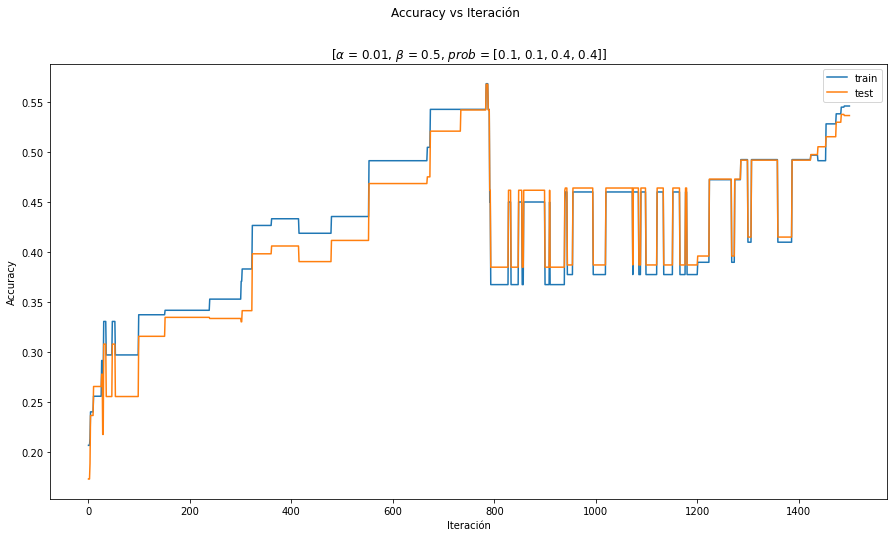

In [153]:
plot_accuracy(bayesian_tree_digit3, X_train_digit, y_train_digit, X_test_digit, y_test_digit)

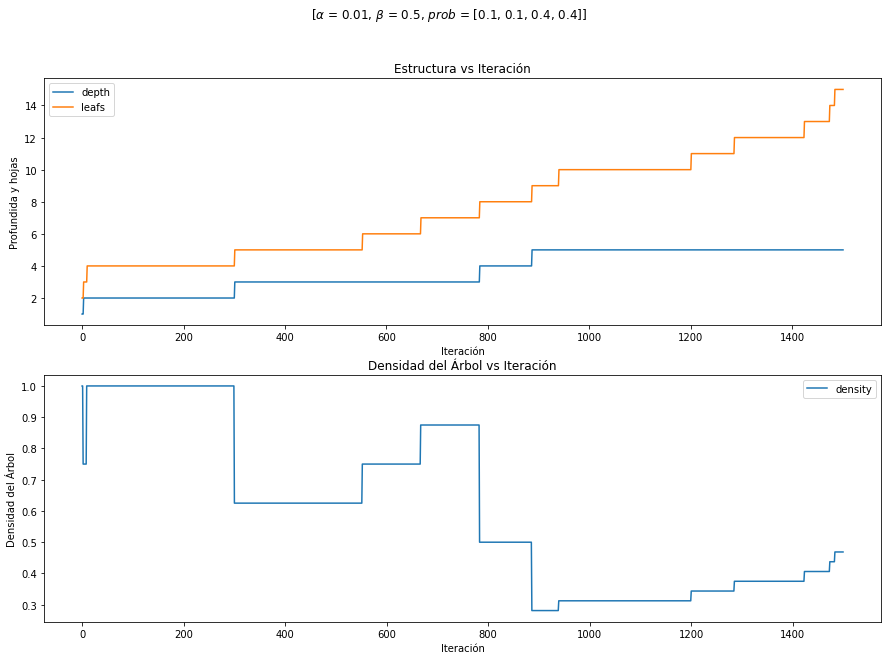

In [154]:
plot_info(bayesian_tree_digit3)

In [156]:
path_digit3 = bayesian_tree_digit3.path
accuracy_digit_test3 = bayesian_tree_digit3.path_acurracy(X_test_digit, y_test_digit)
idx_test_max_digit3 = np.argmax(accuracy_digit_test3)
best_tree_digit3 = path_digit3[idx_test_max_digit3]
best_tree_digit3.set_labels(feature_names_digit,labels_names_digit)
print(accuracy_digit_test3[idx_test_max_digit3])

0.5672969966629589


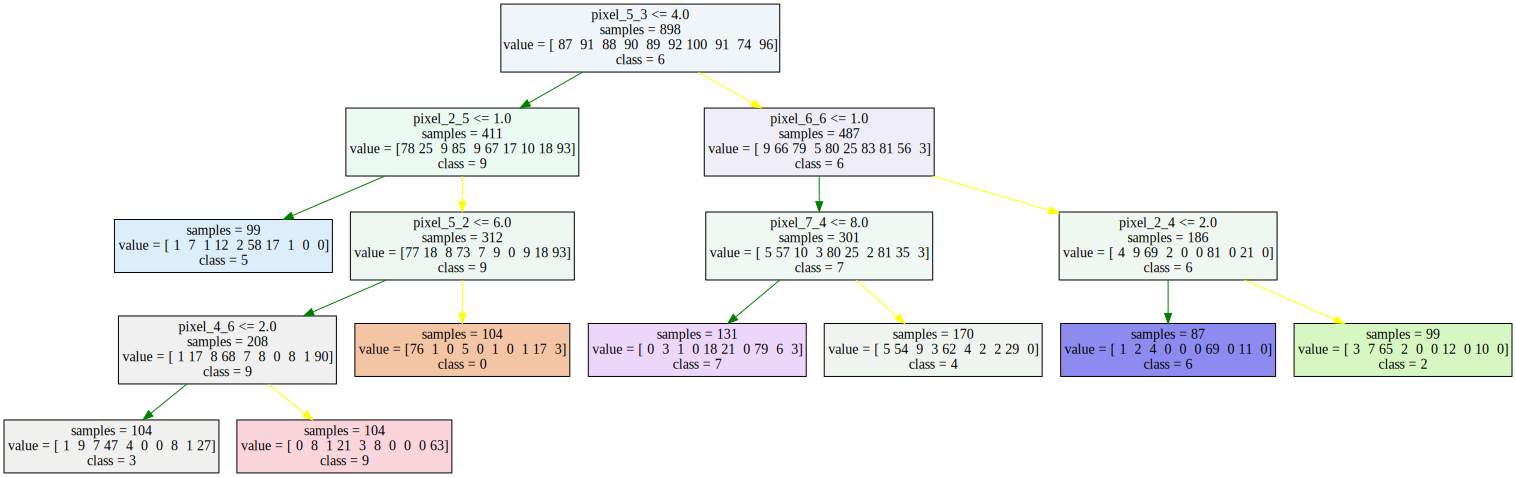

In [157]:
best_tree_digit3.graph_desiciontree()

              precision    recall  f1-score   support

           0       0.70      0.78      0.74        91
           1       0.00      0.00      0.00        91
           2       0.57      0.92      0.70        89
           3       0.51      0.45      0.48        93
           4       0.36      0.79      0.49        92
           5       0.71      0.54      0.62        90
           6       0.83      0.73      0.78        81
           7       0.62      0.86      0.72        88
           8       0.00      0.00      0.00       100
           9       0.56      0.69      0.62        84

    accuracy                           0.57       899
   macro avg       0.49      0.58      0.51       899
weighted avg       0.48      0.57      0.50       899

[[71  0  6  0 10  1  3  0  0  0]
 [ 0  0 11 14 53  6  1  3  0  3]
 [ 0  0 82  1  4  0  1  0  0  1]
 [ 8  0  2 42  4  5  0  3  0 29]
 [ 0  0  2  0 73  0  0 13  0  4]
 [ 1  0  0  4  8 49  1 22  0  5]
 [ 0  0 12  0  3  7 59  0  0  0]
 [ 2  0  0

C:\Users\jorge\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jorge\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jorge\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


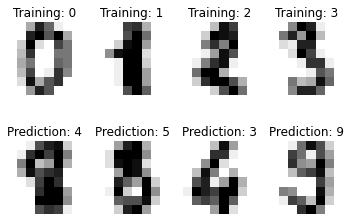

In [158]:
y_pred_digit3 = best_tree_digit3.predict(X_test_digit)

_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

    images_and_predictions = list(zip(digits.images[n_samples // 2:], y_pred_digit))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)

print((metrics.classification_report(y_test_digit, y_pred_digit3)))
print((metrics.confusion_matrix(y_test_digit, y_pred_digit3)))